# Plotting in Python

## 1. Line Plots

Make some fake data:

In [71]:
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols
from IPython.core.interactiveshell import InteractiveShell


year = [1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
metsRecord = [0.543, 0.595, 0.580, 0.506, 0.491, 0.427, 0.470, 0.512, 0.599, 0.543, 0.549, 0.432, 0.488, 0.475, 0.457, 0.457, 0.488, 0.556, 0.537, 0.432, 0.475, 0.531, 0.433]
os.chdir("C://Users//joann//Downloads")

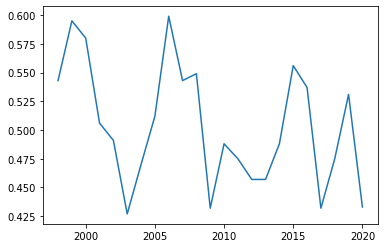

In [41]:
plt.plot(year, metsRecord)

## 2. Scatter Plot

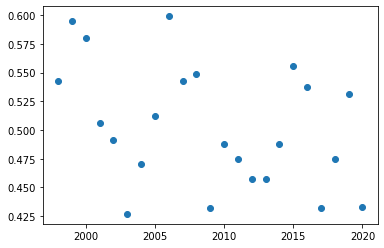

In [21]:
plt.scatter(year, metsRecord)


# Plot Customization

#### Change axes labels

## Make scatter plot prettier

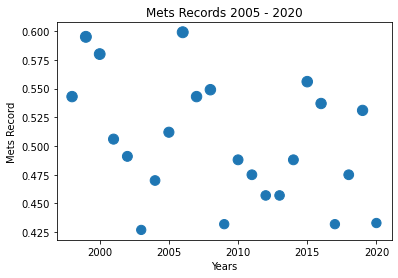

In [17]:
import numpy as np

metsRec_array = np.array(metsRecord)

# Double np_pop
metsRec_array = metsRec_array * 200

# Update: set s argument to np_pop
plt.scatter(year, metsRecord, s = metsRec_array)

# Previous customizations
# plt.xscale('log') 
plt.xlabel('Years')
plt.ylabel('Mets Record')
plt.title('Mets Records 2005 - 2020')

# Display the plot
plt.show()


# Look only at 2015 season

In [18]:
df = pd.read_csv("baseball.csv")
df

,Game,Date,Team,Advantage,Opp,WinLoss,Runs,RunsAllowed,ExtraInnings,W-L,Rank,GamesBack,WinningPitcher,LosingPitcher,Save,Duration,D/N,Attendance,cLI,Streak
0,1,"Monday, Apr 6",NYM,Away,WSN,W,3,1,NaN,1-0,1,Tied,Colon,Scherzer,Carlyle,2:35,D,"42,295",1.05,+
1,2,"Wednesday, Apr 8",NYM,Away,WSN,L,1,2,NaN,1-1,2,1.5,Zimmermann,deGrom,Storen,2:21,N,"25,999",1.11,-
2,3,"Thursday, Apr 9",NYM,Away,WSN,W,6,3,NaN,2-1,2,1,Harvey,Strasburg,NaN,2:54,D,"25,327",1.11,+
3,4,"Friday, Apr 10",NYM,Away,ATL,L,3,5,NaN,2-2,2,2,Johnson,Montero,Grilli,3:01,N,"46,279",1.16,-
4,5,"Saturday, Apr 11",NYM,Away,ATL,L,3,5,NaN,2-3,3,3,Teheran,Gee,Johnson,2:25,N,"36,056",1.16,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,158,"Wednesday, Sep 30",NYM,Away,PHI,L,5,7,NaN,89-69,1,up 9.0,Roberts,Parnell,Giles,3:59,N,"15,201",0.32,--
158,159,"Thursday, Oct 1",NYM,Away,PHI,L,0,3,NaN,89-70,1,up 8.0,Eickhoff,Gilmartin,Garcia,2:23,D,"13,238",0.26,---
159,160,"Saturday, Oct 3 (1)",NYM,Home,WSN,L,1,3,NaN,89-71,1,up 6.0,Martin,Reed,Vazquez,2:44,D,"39,465",0.39,----
160,161,"Saturday, Oct 3 (2)",NYM,Home,WSN,L,0,2,NaN,89-72,1,up 6.0,Scherzer,Harvey,NaN,2:14,N,"41,480",0.39,-----


### We can see the type of each dataframe element

#### 'int64' = integer
#### 'object'= essentially the same as factor
#### 'float64'= numerical value with decimals

In [11]:
df.dtypes

Game                int64
Date               object
Team               object
Advantage          object
Opp                object
WinLoss            object
Runs                int64
RunsAllowed         int64
ExtraInnings      float64
W-L                object
Rank                int64
GamesBack          object
WinningPitcher     object
LosingPitcher      object
Save               object
Duration           object
D/N                object
Attendance         object
cLI               float64
Streak             object
dtype: object

### Summarize some of the data

In [20]:
df.groupby("Opp")["Runs"].mean()

Opp
ARI    4.000000
ATL    4.526316
BAL    4.250000
BOS    3.333333
CHC    1.571429
CIN    6.714286
COL    8.000000
LAD    4.714286
MIA    4.789474
MIL    4.000000
NYY    3.333333
PHI    5.842105
PIT    1.666667
SDP    4.333333
SFG    2.833333
STL    2.285714
TBR    3.666667
TOR    2.000000
WSN    3.210526
Name: Runs, dtype: float64

In [14]:
df.groupby("D/N")["Runs"].mean()

D/N
D    4.530612
N    4.079646
Name: Runs, dtype: float64

## Visualize the data using a scatter plot

Text(0, 0.5, 'Runs per Game')

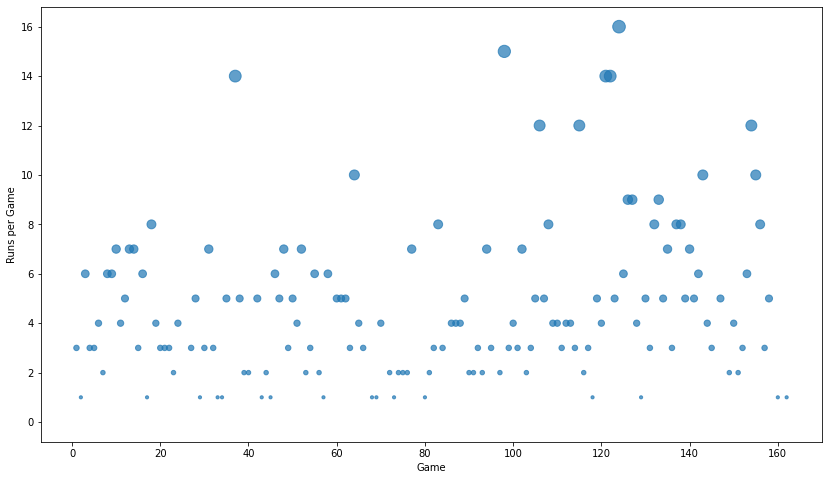

In [50]:
plt.figure(figsize=(14,8))
x=df["Game"]
y=df["Runs"]
z=df["Advantage"]


y2=y*10
plt.scatter(x, y, s=y2,alpha=0.7)
plt.xlabel("Game")
plt.ylabel("Runs per Game")



### Make it a little fancier

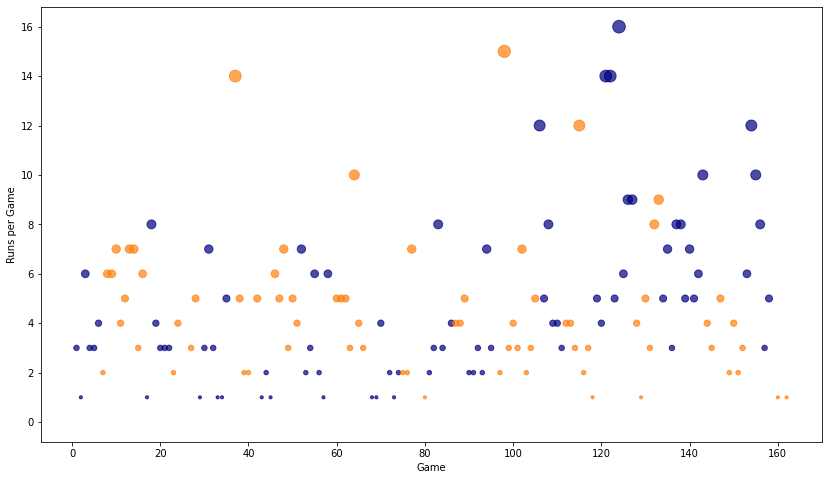

In [53]:
plt.figure(figsize=(14,8))
col={"Home":"tab:orange",
    "Away":"navy"}
plt.xlabel("Game")
plt.ylabel("Runs per Game")

plt.scatter(x, y, s=y2,alpha=0.7, c=z.map(col))

# Run an ANOVA

### Look at the difference in runs by opponent

We're using the statsmodel package now


First set up the model:

In [61]:
mod=ols('Runs ~ Opp', data=df).fit()


Now turn it into an anova 

In [62]:
aov_table=sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq     df         F    PR(>F)
Opp        376.942658   18.0  2.267785  0.004049
Residual  1320.495614  143.0       NaN       NaN


In [69]:
pd.set_option('display.max_rows', 171)

pair_t = mod.t_test_pairwise('Opp')
pair_t.result_frame



,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
ATL-ARI,5.263158e-01,1.343573,3.917284e-01,0.695842,-2.129515,3.182146,1.000000,False
BAL-ARI,2.500000e-01,1.904661,1.312569e-01,0.895757,-3.514929,4.014929,1.000000,False
BOS-ARI,-6.666667e-01,2.096963,-3.179201e-01,0.751009,-4.811718,3.478384,1.000000,False
CHC-ARI,-2.428571e+00,1.624301,-1.495149e+00,0.137079,-5.639314,0.782171,1.000000,False
CIN-ARI,2.714286e+00,1.624301,1.671049e+00,0.096899,-0.496457,5.925028,0.999999,False
COL-ARI,4.000000e+00,1.624301,2.462598e+00,0.014981,0.789257,7.210743,0.902175,False
LAD-ARI,7.142857e-01,1.624301,4.397497e-01,0.660782,-2.496457,3.925028,1.000000,False
MIA-ARI,7.894737e-01,1.343573,5.875926e-01,0.557732,-1.866357,3.445304,1.000000,False
MIL-ARI,5.129013e-15,1.690626,3.033795e-15,1.000000,-3.341847,3.341847,1.000000,False
NYY-ARI,-6.666667e-01,1.690626,-3.943313e-01,0.693924,-4.008514,2.675180,1.000000,False


## Plot the data 

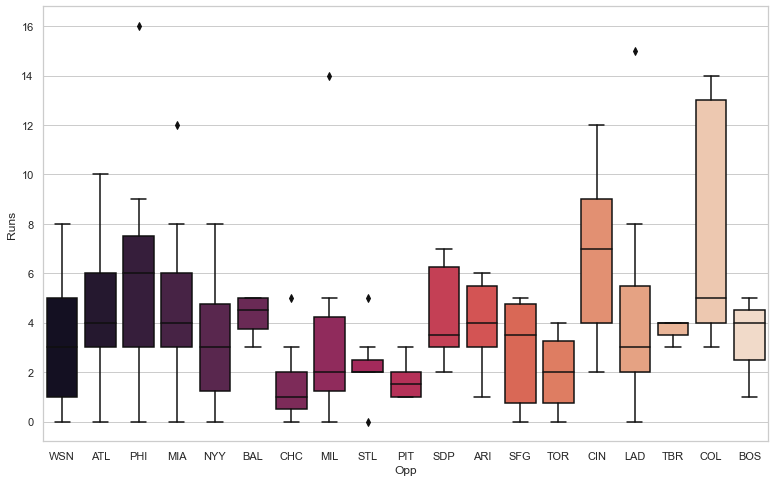

In [80]:
sns.set(rc={'figure.figsize':(13,8)})
sns.set_theme(style="whitegrid")


ax = sns.boxplot(x="Opp", y=y, data=df, palette="rocket")

## Look at further moderators

Home field advantage vs away games

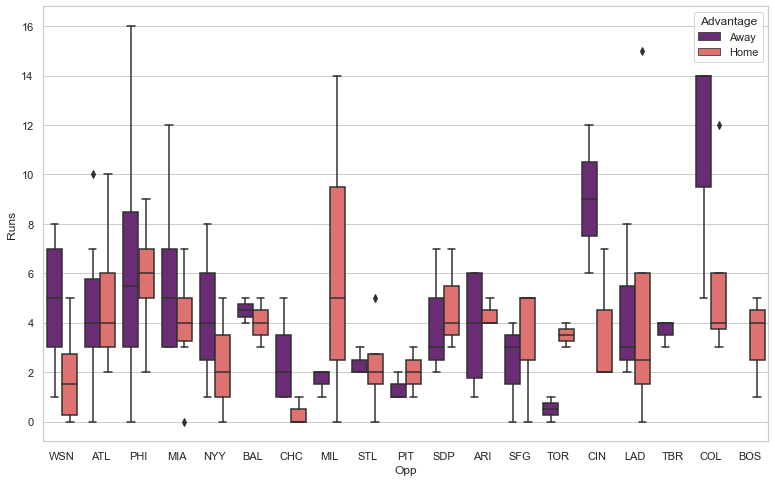

In [83]:

ax = sns.boxplot(x="Opp", y=y, hue=z,
                 data=df, palette="magma")